Installing geopandas

In [30]:
!pip install geopandas

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

import geopandas as gpd
import zipfile, re, os

import warnings
warnings.filterwarnings('ignore')

Loading data

In [32]:
df = pd.read_json('https://raw.githubusercontent.com/melchior2137/otodom_visualization/main/data/cracow_data.json')
df

,date,city,slug_city,district,slug_district,available_offers,available_investments,sold,added,avg_price_m2
0,2022-11-01,Kraków,krakow,Bieńczyce,bienczyce,4,1,0,0,10200.00
1,2022-11-01,Kraków,krakow,Bieżanów-Prokocim,biezanow-prokocim,431,7,66,0,10390.28
2,2022-11-01,Kraków,krakow,Bronowice,bronowice,460,11,26,0,12759.42
3,2022-11-01,Kraków,krakow,Czyżyny,czyzyny,367,5,18,0,10987.30
4,2022-11-01,Kraków,krakow,Dębniki,debniki,220,6,38,0,12654.95
5,2022-11-01,Kraków,krakow,Grzegórzki,grzegorzki,215,3,33,92,17479.70
6,2022-11-01,Kraków,krakow,Krowodrza,krowodrza,98,4,11,3,14678.82
7,2022-11-01,Kraków,krakow,Łagiewniki-Borek Fałęcki,lagiewniki-borek-falecki,162,3,7,0,11714.86
8,2022-11-01,Kraków,krakow,Mistrzejowice,mistrzejowice,58,2,5,0,9580.93
9,2022-11-01,Kraków,krakow,Nowa Huta,nowa-huta,23,1,0,0,9845.65


In [33]:
df_districts = df[['district', 'available_offers']]
df_districts

,district,available_offers
0,Bieńczyce,4
1,Bieżanów-Prokocim,431
2,Bronowice,460
3,Czyżyny,367
4,Dębniki,220
5,Grzegórzki,215
6,Krowodrza,98
7,Łagiewniki-Borek Fałęcki,162
8,Mistrzejowice,58
9,Nowa Huta,23


Loading map shape

In [34]:
districts = gpd.read_file('/vsicurl/https://github.com/melchior2137/otodom_visualization/raw/main/data/districts_map/dzielnice_Krakowa.shp')
districts = districts[['nazwa', 'geometry']]
districts.rename(columns={'nazwa' : 'district'}, inplace=True)
districts

,district,geometry
0,Stare Miasto,"POLYGON ((566097.260 244329.716, 566097.477 24..."
1,Grzegórzki,"POLYGON ((567784.500 244043.139, 567786.287 24..."
2,Prądnik Czerwony,"POLYGON ((567758.514 246401.517, 567774.358 24..."
3,Prądnik Biały,"POLYGON ((561609.805 249100.253, 561714.891 24..."
4,Krowodrza,"POLYGON ((563475.506 244986.213, 563476.971 24..."
5,Bronowice,"POLYGON ((559680.480 247139.293, 559681.829 24..."
6,Zwierzyniec,"POLYGON ((557355.217 244969.030, 557369.220 24..."
7,Dębniki,"POLYGON ((556746.136 238581.515, 556750.361 23..."
8,Łagiewniki-Borek Fałęcki,"POLYGON ((564972.632 238410.627, 564976.023 23..."
9,Swoszowice,"POLYGON ((563480.973 235645.246, 563486.811 23..."


<Axes: >

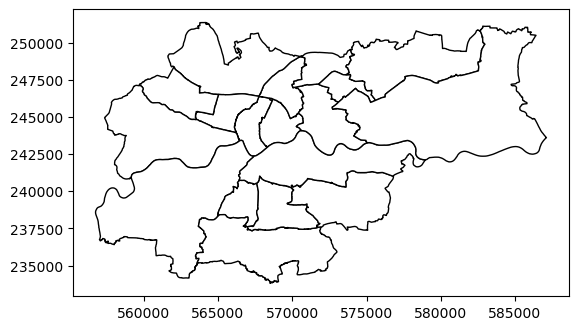

In [35]:
districts.plot(color ='white', edgecolor = 'black')

Merging and sorting two dataframes

In [36]:
merged_df = pd.merge(districts, df_districts, on='district', how = 'outer')
merged_df.sort_values('available_offers', ascending=False)

,district,geometry,available_offers
12,Podgórze,"POLYGON ((566385.478 241086.274, 566390.281 24...",1038.0
3,Prądnik Biały,"POLYGON ((561609.805 249100.253, 561714.891 24...",917.0
5,Bronowice,"POLYGON ((559680.480 247139.293, 559681.829 24...",460.0
11,Bieżanów-Prokocim,"POLYGON ((569666.048 239153.774, 569669.023 23...",431.0
13,Czyżyny,"POLYGON ((570051.983 246991.812, 570055.463 24...",367.0
2,Prądnik Czerwony,"POLYGON ((567758.514 246401.517, 567774.358 24...",296.0
10,Podgórze Duchackie,"POLYGON ((566970.877 237409.550, 566980.142 23...",283.0
6,Zwierzyniec,"POLYGON ((557355.217 244969.030, 557369.220 24...",236.0
7,Dębniki,"POLYGON ((556746.136 238581.515, 556750.361 23...",220.0
1,Grzegórzki,"POLYGON ((567784.500 244043.139, 567786.287 24...",215.0


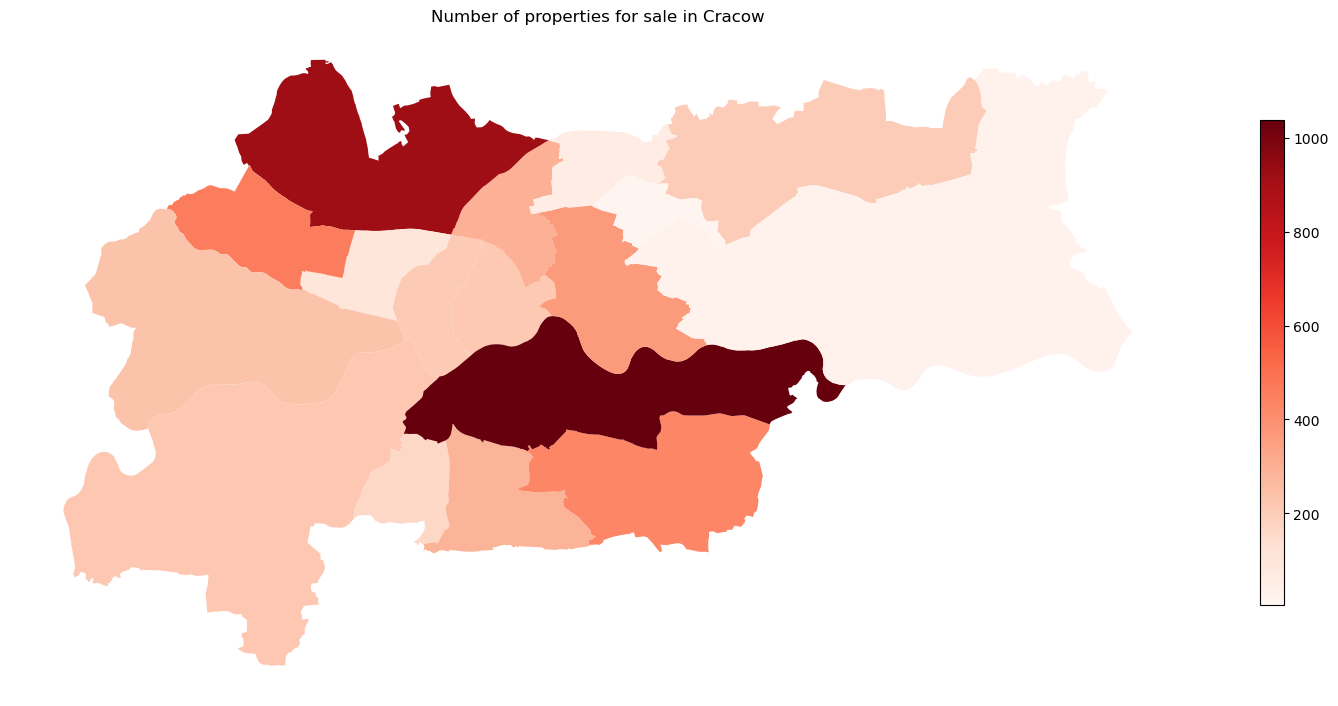

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))
merged_df.plot(column='available_offers', cmap='Reds', linewidth=1.5, ax=ax)

vmin, vmax = merged_df['available_offers'].min(), merged_df['available_offers'].max()
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, shrink=0.5, ax=ax)

ax.grid(True)
ax.set_axis_off()
ax.set_title("Number of properties for sale in Cracow")
plt.tight_layout()
plt.show()


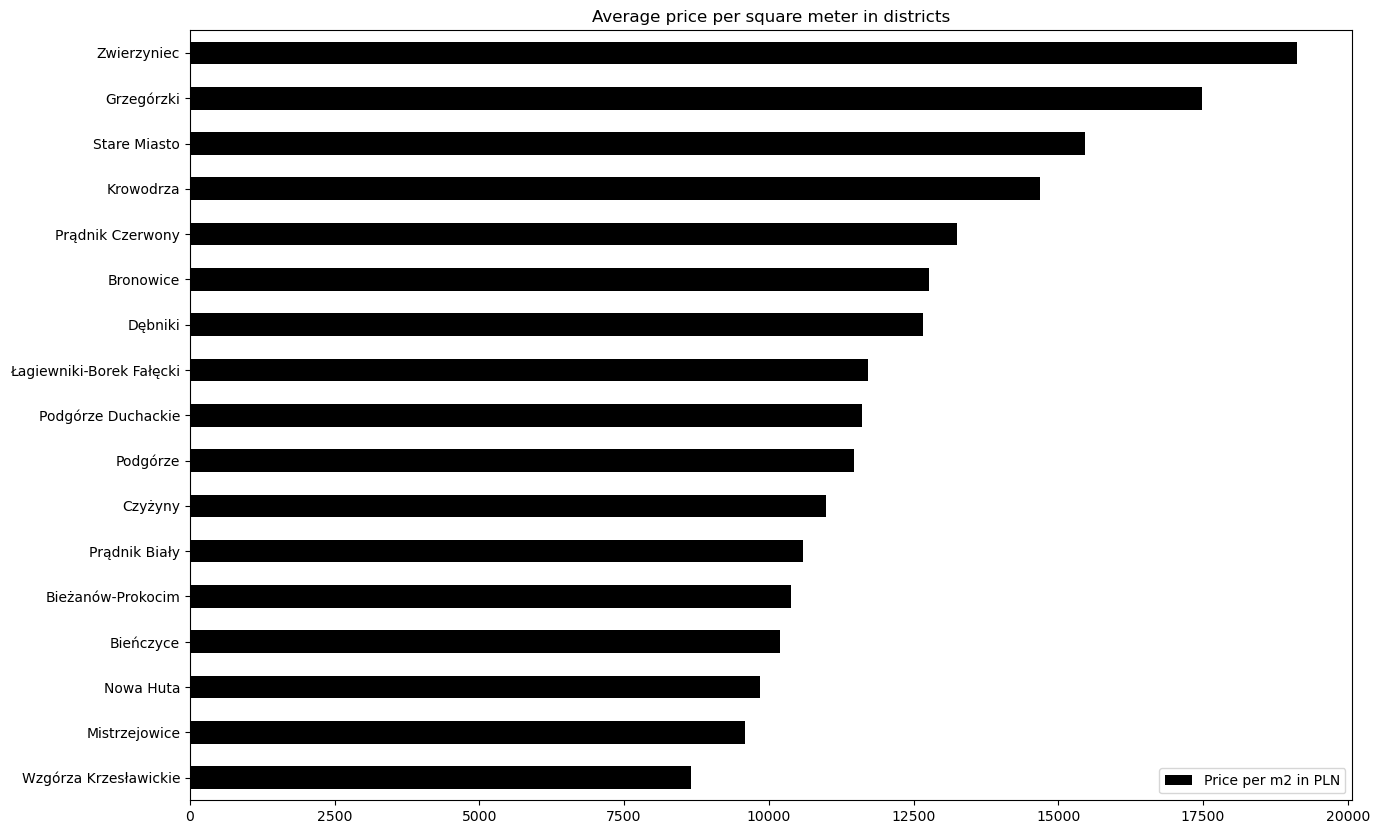

In [43]:
ax = df.sort_values('avg_price_m2').plot('district', 'avg_price_m2', kind = 'barh', figsize = (15,10), title="Average price per square metre in districts", ylabel = '', color = 'black')
ax.legend(["Price per m2 in PLN"]);


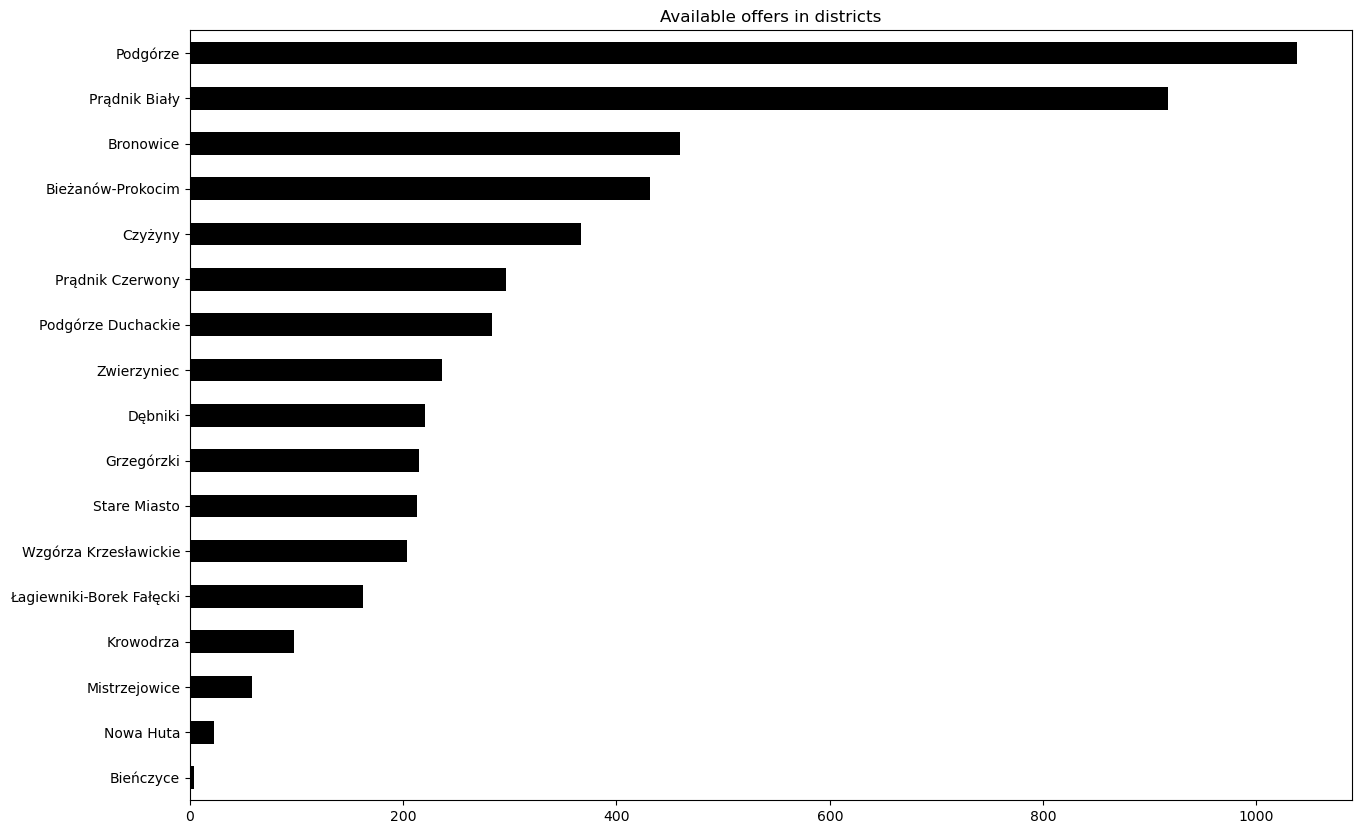

In [42]:
ax = df.sort_values('available_offers').plot('district', 'available_offers', kind = 'barh', figsize = (15,10), title="Available offers in districts", ylabel = '', color = 'black', legend=False)